In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

### Importing data

In [2]:
# Data exported as csv from a google spreadsheet
df = pd.read_csv('data/april15-2020.csv')

# Show 1st record
# df.info()

df.shape

(288, 24)

##  Cleaning dataset
- Results by Region
- Results by Country

In [3]:
print('Null records: {}'.format(len(df[df['Region '].isnull()])))

Null records: 13


In [4]:
# Data cleaning: Region

df = df[df['Region '].notna()]
df['Region '].unique()

array(['Africa', 'Africa ', 'Asia', 'Asia ', 'CSA', 'CSA ', 'ECA', 'MENA',
       'North America'], dtype=object)

In [5]:
# Clean Region column
df['Region '].replace({'US':'North America'}, inplace=True)
df['Region '].replace({'CSA ':'CSA'}, inplace=True)
df['Region '].replace({'Asia ':'Asia'}, inplace=True)
df['Region '].replace({'Africa ':'Africa'}, inplace=True)
df['Region '].unique()

array(['Africa', 'Asia', 'CSA', 'ECA', 'MENA', 'North America'],
      dtype=object)

In [6]:
df['Country'].unique()

array(['Kenya', 'Nigeria', 'Niger', 'South Africa', 'Ethiopia', 'DRC',
       'Nigeria ', 'Zimbabwe', 'Cameroon', 'Liberia ', 'Uganda',
       'Liberia', 'Tanzania', 'Kenya ', 'Zambia', "Cote d'Ivoire ",
       'South Korea', 'South Korea ', 'Singapore ', 'Taiwan', 'India ',
       'China ', 'India', 'Thailand', 'Nepal', 'Philippines ', 'Malaysia',
       'New Zealand', 'Vietnam', 'Bangladesh ', 'Bolivia', 'Brazil',
       'Ecuador', 'Colombia', 'Venezuela', 'Argentina', 'Venezuela ',
       'Peru', 'Dominican Republic', 'Aruba', 'Dominican Republic ',
       'Honduras', 'El Salvador', 'El Salvador ', 'Trinidad & Tobago',
       'Cuba', 'Haiti', 'Turkey', 'Russia ', 'Austria', 'Italy', 'Poland',
       'Spain', 'Serbia', 'UK', 'Slovenia', 'Ukraine ', 'Azerbaijan',
       'Hungary', 'Armenia', 'Croatia', 'North Macedonia', 'Bulgaria',
       'Bosnia', 'Moldova', 'Kosovo', 'Russian Federation', 'Iran',
       'Iraq', 'Egypt', 'Jordan', 'Oman', 'Morocco', 'Iraqi Kurdistan',
       'Iran '

In [7]:
# Data cleaning: countries
df['Country'].isnull().value_counts()
# df[df['Country'].isnull()]

False    275
Name: Country, dtype: int64

In [8]:
# If needed, edit specific cells with null values in the country column

# df.iloc[11][1] = 'US'
# df.iloc[11]

In [9]:
# Cleaning countries column
df['Country'] = df['Country'].str.strip()

df['Country'].replace({'U.S.':'US'}, inplace=True)
df['Country'].replace({'US (Israeli company)':'US'}, inplace=True)
df['Country'].replace({'Russian Federation':'Russia'}, inplace=True)

list_countries = df['Country'].sort_values().unique()

print(len(list_countries))
print(df['Country'].sort_values().unique())

68
['Argentina' 'Armenia' 'Aruba' 'Austria' 'Azerbaijan' 'Bangladesh'
 'Bolivia' 'Bosnia' 'Brazil' 'Bulgaria' 'Cameroon' 'Canada' 'China'
 'Colombia' "Cote d'Ivoire" 'Croatia' 'Cuba' 'DRC' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Ethiopia' 'Haiti' 'Honduras' 'Hungary'
 'India' 'Iran' 'Iraq' 'Iraqi Kurdistan' 'Israel' 'Italy' 'Jordan' 'Kenya'
 'Kosovo' 'Liberia' 'Malaysia' 'Moldova' 'Morocco' 'Nepal' 'New Zealand'
 'Niger' 'Nigeria' 'North Macedonia' 'Oman' 'Peru' 'Philippines' 'Poland'
 'Russia' 'Serbia' 'Singapore' 'Slovenia' 'South Africa' 'South Korea'
 'Spain' 'Taiwan' 'Tanzania' 'Thailand' 'Trinidad & Tobago' 'Turkey' 'UK'
 'US' 'Uganda' 'Ukraine' 'Venezuela' 'Vietnam' 'Zambia' 'Zimbabwe']


### Cleaned data summary: Region

275 valid records. Distribution by region:


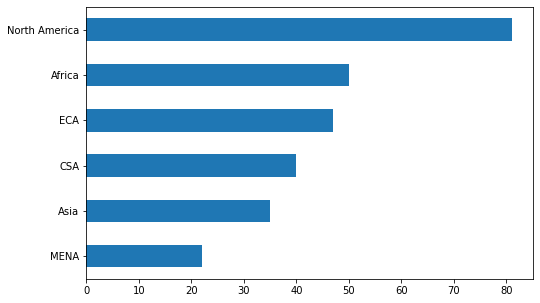

In [10]:
# Number of entries by region
df['Region '] = df['Region '].str.strip()
df['Region '].value_counts().sort_values().plot(kind='barh', figsize=(8,5))
print('{} valid records. Distribution by region:'.format(df['Region '].count()))

### Cleaned data summary: Countries

List of 9 countries out of 68 with more than 5 record in the database


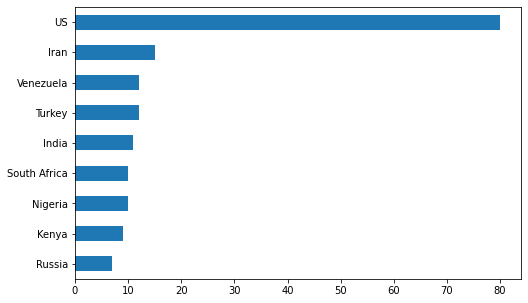

In [11]:
# Number of entries by country
countries = df['Country'].value_counts().sort_values(ascending = False)

i = 5

top_countries = countries[countries > i].sort_values()

top_countries.plot(kind='barh', figsize=(8,5))
print('List of {} countries out of {} with more than {} record in the database'.format(len(top_countries), len(list_countries), i))

### Columns formatting

In [12]:
# Rename columns
df.rename(columns={"Date (M.DD.Y)": "date", 
                   "Mention or use of false news measure (Y/N)": "false_news",
                   "Detained (Y/N)": "detained",
                   "Arrested (Y/N) ": "arrested",
                   "Imprisoned (Y/N) ": "imprisoned",
                   "Access Denied (Y/N)": "access_denied",
                   "Chilling Statement (Y/N)": "chilling_statement",
                   "Attacked (Y/N)": "attacked",
                   "Charged (Y/N) ": "charged",
                   "Online Harassment (Y/N)": "online_harassment",
                   "Threatened (Y/N)": "threatened",
                   "Death (Y/N)": "death",
                   "Criminalization: type of new or amended law (please specify)": "criminalization",
                   "Surveillance (Y/N)" : 'surveillance',
                   "Disinformation or propaganda (Y/N)": "disinformation_propaganda"}, inplace=True)

df.columns

Index(['Region ', 'Country', 'City, Region', 'Description', 'date', 'Link',
       'false_news', 'detained', 'arrested', 'imprisoned', 'access_denied',
       'chilling_statement', 'attacked', 'charged', 'online_harassment',
       'threatened', 'death', 'surveillance', 'New law or amendment Y/N',
       'disinformation_propaganda', 'Censorship', 'Print Media',
       'layoffs/furloughs/closures/salary cuts', 'Prisoner released Y/N'],
      dtype='object')

In [13]:
# List of columns to boolean
columns_to_boolean = ['false_news', 
                      'detained', 
                      'arrested', 
                      'imprisoned', 
                      'access_denied',
                      'chilling_statement',
                      'attacked',
                      'charged',
                      'online_harassment',
                      'threatened',
                      'death',
                      'surveillance',
                      'disinformation_propaganda']

In [14]:
def check_uniques_boolean(data, cols):
    for i in cols:
        print('{} : {} ({})'.format(i, data[i].nunique(), data[i].unique()))

In [15]:
check_uniques_boolean(df, columns_to_boolean)

false_news : 1 ([nan 'Y'])
detained : 3 ([nan 'Y' 'N' 'y'])
arrested : 2 ([nan 'Y' 'N'])
imprisoned : 2 ([nan 'N' 'Y'])
access_denied : 2 ([nan 'N' 'Y'])
chilling_statement : 3 ([nan 'N' 'Y' 'y'])
attacked : 2 ([nan 'Y' 'N'])
charged : 2 ([nan 'Y' 'N'])
online_harassment : 2 ([nan 'N' 'Y'])
threatened : 3 ([nan 'Y' 'N' 'y'])
death : 2 ([nan 'N' 'Y'])
surveillance : 3 (['Y' nan 'N' 'Y '])
disinformation_propaganda : 4 ([nan '?' 'N' 'Y' 'y'])


In [16]:
for i in columns_to_boolean:
    #replace values
    df[i] = df[i].str.strip()
    df[i].replace({'y':'Y'}, inplace=True)
    df[i].replace({'Y(?)':'Y'}, inplace=True)
    df[i].replace({'Y(?)':'Y'}, inplace=True)
    df[i].replace({'?':'N'}, inplace=True)
    
# check again for uniques
check_uniques_boolean(df, columns_to_boolean)
    

false_news : 1 ([nan 'Y'])
detained : 2 ([nan 'Y' 'N'])
arrested : 2 ([nan 'Y' 'N'])
imprisoned : 2 ([nan 'N' 'Y'])
access_denied : 2 ([nan 'N' 'Y'])
chilling_statement : 2 ([nan 'N' 'Y'])
attacked : 2 ([nan 'Y' 'N'])
charged : 2 ([nan 'Y' 'N'])
online_harassment : 2 ([nan 'N' 'Y'])
threatened : 2 ([nan 'Y' 'N'])
death : 2 ([nan 'N' 'Y'])
surveillance : 2 (['Y' nan 'N'])
disinformation_propaganda : 2 ([nan 'N' 'Y'])


In [17]:
# Make columns boolean: 1/0
for i in columns_to_boolean:
    df[i] = df[i].apply(lambda x: 1 if x =='Y' else 0).astype('int32')
    
df[columns_to_boolean].nunique()

false_news                   2
detained                     2
arrested                     2
imprisoned                   2
access_denied                2
chilling_statement           2
attacked                     2
charged                      2
online_harassment            2
threatened                   2
death                        2
surveillance                 2
disinformation_propaganda    2
dtype: int64

In [18]:
# PENDING: dates formatting
# df.date.unique()

### Sumary: additional classification

In [19]:
#Summary of values in boolean columns
tags = df[columns_to_boolean].apply(pd.Series.value_counts).T
tags[1].sort_values(ascending = False)

false_news                   36
surveillance                 26
detained                     25
threatened                   22
attacked                     22
chilling_statement           18
arrested                     16
access_denied                11
disinformation_propaganda     9
online_harassment             8
charged                       7
imprisoned                    4
death                         1
Name: 1, dtype: int64

Number of records with additional classification:


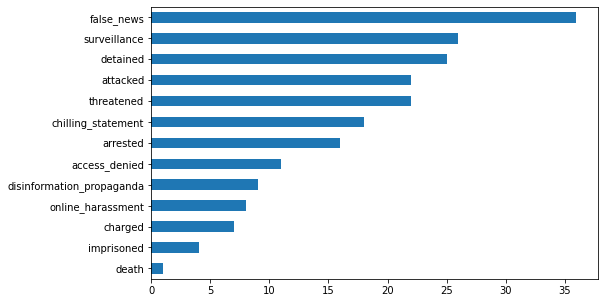

In [20]:
#Summary of values in boolean columns
tags = df[columns_to_boolean].apply(pd.Series.value_counts).T
print("Number of records with additional classification:")
tags[1].sort_values(ascending = False)
tags[1].sort_values(ascending = False).sort_values().plot(kind='barh', figsize=(8,5))

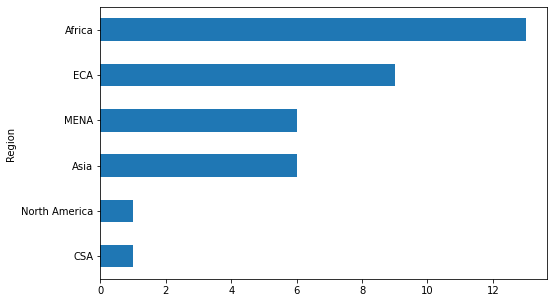

In [21]:
regions_false_news = df.loc[df['false_news'] == 1]

regions_false_news.groupby(['Region '])['false_news'].count().sort_values().plot(kind='barh', figsize=(8,5))

## Functions
- Filter by one or two columns, print summary data & table
- Calculate all combinations of boolean variables

In [22]:
# Filter data by one column
def filter_by_column(data, col):
    table = data.loc[data[col] == 1]
    
#     pd.set_option('display.max_colwidth', -1)
    
    print('\nThere are {} records classified as {}:\n'.format(len(table), col))
    print(table[['Country', 'Link']])
    
    print('\nDistribution by region')
    table['Region '].value_counts().plot(kind='barh', figsize=(8,5))
    

In [23]:
# Filter data by two columns
def filter_by_two_columns(data, col1, col2):
    table = data.loc[(data[col1] == 1) & (data[col2] == 1)]
    try:
        print('\nThere are {} records classified as {} and {}:\n'.format(len(table), col1, col2))
        print(table[['Country', 'Link']])  
#         print('\nDistribution by country')
#         table['Country'].value_counts().plot(kind='barh', figsize=(10,5))
    
    except IndexError:
        print('No results')
        pass


### Summary: disinformation_propaganda


There are 9 records classified as disinformation_propaganda:

     Country                                               Link
59     China  https://www.propublica.org/article/how-china-b...
64    Taiwan  https://bulletin.tfd.org.tw/tdb-vol-4-no-1-tai...
85   Bolivia  https://www.lavanguardia.com/politica/20200318...
135  Ukraine  https://www.buzzfeednews.com/article/christoph...
136   Russia  https://www.theguardian.com/world/2020/mar/18/...
139  Armenia  https://eurasianet.org/armenia-takes-hard-line...
202       US  https://apnews.com/7edbc93627b1040a422f2d07f50...
214       US  https://www.journalism.org/2020/03/18/american...
239       US  https://www.nytimes.com/2020/03/28/us/testing-...

Distribution by region


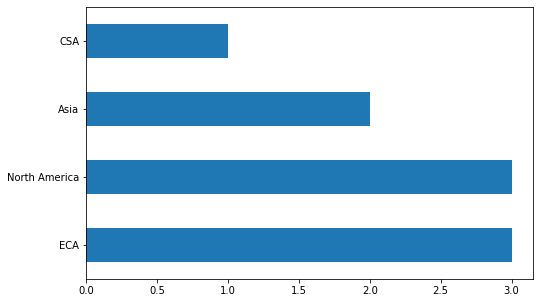

In [24]:
filter_by_column(df, 'disinformation_propaganda')


There are 26 records classified as surveillance:

          Country                                               Link
0           Kenya  https://www.standardmedia.co.ke/article/200136...
1           Kenya  https://www.standardmedia.co.ke/health/article...
47   South Africa  https://www.bloomberg.com/news/articles/2020-0...
50    South Korea  https://www.technologyreview.com/s/615329/coro...
51    South Korea  https://www.washingtonpost.com/world/asia_paci...
52    South Korea  https://www.wsj.com/articles/how-china-slowed-...
55      Singapore  https://www.wsj.com/articles/how-china-slowed-...
56         Taiwan  https://www.wsj.com/articles/how-china-slowed-...
57          India  https://www.huffingtonpost.in/entry/aarogya-se...
85        Bolivia  https://www.lavanguardia.com/politica/20200318...
86         Brazil  https://www.uol.com.br/tilt/noticias/redacao/2...
87        Ecuador  https://twitter.com/usuariosdigital/status/124...
120      Honduras  https://www.coindesk.com/as-gover

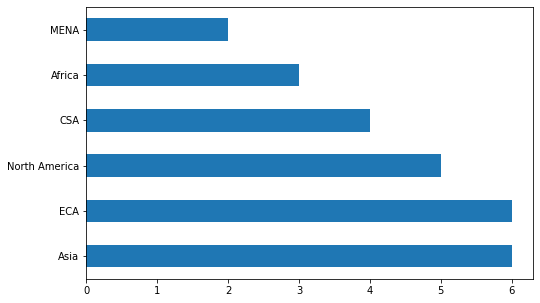

In [25]:
filter_by_column(df, 'surveillance')


There are 36 records classified as false_news:

                Country                                               Link
2               Nigeria  https://www.legit.ng/1298893-coronavirus-court...
3                 Niger  https://twitter.com/CPJAfrica/status/123848961...
4                 Kenya  https://www.africanews.com/2020/03/16/media-wa...
6          South Africa  https://twitter.com/Dariomilo/status/124038234...
7                 Kenya  https://www.nation.co.ke/news/Alai-faces-court...
13             Ethiopia  https://twitter.com/befeqe/status/124356075819...
15             Zimbabwe  https://www.thestandard.co.zw/2020/03/29/20-ye...
28               Uganda  https://www.pmldaily.com/news/2020/03/breaking...
32              Nigeria  https://www.premiumtimesng.com/news/top-news/3...
34              Liberia  https://frontpageafricaonline.com/news/liberia...
35             Tanzania                                       Jamii Forums
42         South Africa  https://www.gov.za/documen

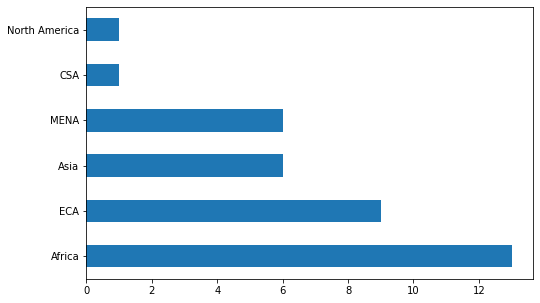

In [26]:
filter_by_column(df, 'false_news')

In [27]:
# Filter data by two columns
filter_by_two_columns(df, 'disinformation_propaganda', 'false_news')


There are 3 records classified as disinformation_propaganda and false_news:

     Country                                               Link
64    Taiwan  https://bulletin.tfd.org.tw/tdb-vol-4-no-1-tai...
135  Ukraine  https://www.buzzfeednews.com/article/christoph...
139  Armenia  https://eurasianet.org/armenia-takes-hard-line...


## Test: Clustering

In [28]:
# columns with boolean values
d = df[columns_to_boolean]


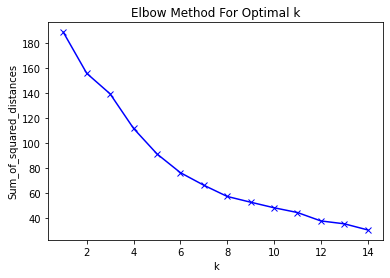

In [29]:
# Determining the number of clusters in the dataset
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(d)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Hierarchical clustering

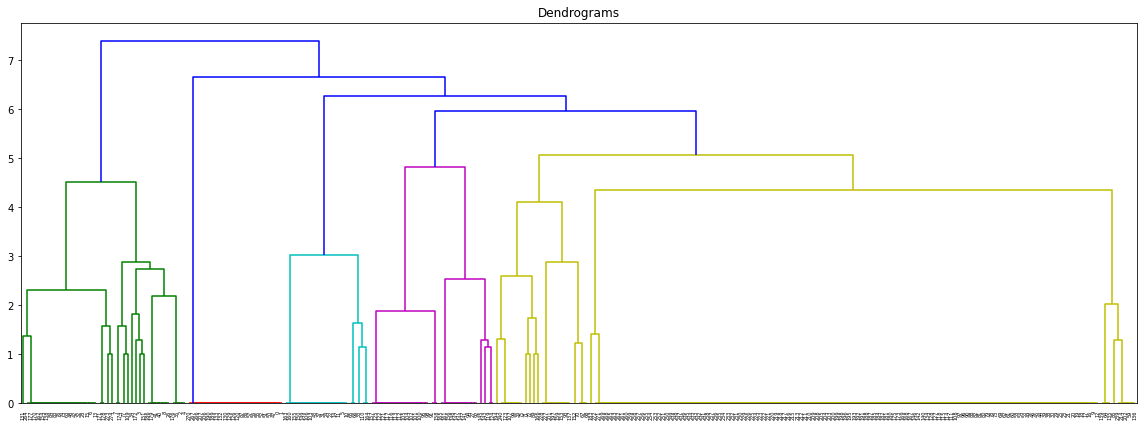

In [30]:
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(d, method='ward'))

### K-means clustering

In [31]:
#Create clusters
n = 6
clusters = KMeans(n_clusters=n)

# Fit clusterer
clusters.fit(d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
df['group'] = clusters.predict(d)

In [33]:
df.group.unique()

array([2, 4, 3, 1, 0, 5], dtype=int32)

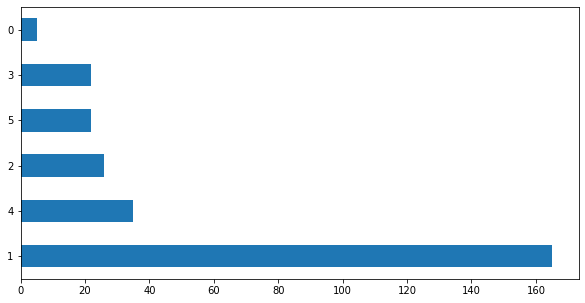

In [34]:
df.group.value_counts().plot(kind='barh', figsize=(10,5))

In [35]:
df[(df['group'] == 0)]

,Region,Country,"City, Region",Description,date,Link,false_news,detained,arrested,imprisoned,...,threatened,death,surveillance,New law or amendment Y/N,disinformation_propaganda,Censorship,Print Media,layoffs/furloughs/closures/salary cuts,Prisoner released Y/N,group
67,Asia,India,"Hyderabad, Telangana",Police in Hyderabad also beat and insulted Men...,3.23.2020,https://www.siasat.com/journalist-unions-lodge...,0,0,0,1,...,0,0,0,NaN,0,NaN,NaN,NaN,NaN,0
68,Asia,India,"Hyderabad, Telangana","Police in Hyderabad hit Mohammed Hussain, a re...",3.23.2020,https://twitter.com/writetohussain/status/1242...,0,0,0,1,...,0,0,0,NaN,0,NaN,NaN,NaN,NaN,0
70,Asia,India,"Thane, Maharashtra",ETV deputy news editor Uttkarsh Chaturvedi was...,3.26.2020,https://www.rediff.com/news/report/tv-journali...,0,0,0,1,...,0,0,0,NaN,0,NaN,NaN,NaN,NaN,0
89,CSA,Venezuela,NaN,Socorro has been target of coordinated state t...,3.0.2020,https://twitter.com/MilagrosSocorro/status/123...,0,0,0,0,...,0,0,0,NaN,0,NaN,NaN,NaN,NaN,0
152,ECA,Serbia,Belgrade,Government severly restricts flow of informati...,4.01.2020,https://balkaninsight.com/2020/04/01/serbian-g...,0,0,0,1,...,0,0,0,,0,NaN,NaN,NaN,NaN,0
